# Captura de datos

In [78]:
import numpy as np
from pandas import read_csv
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR



# -----------------------------------------------------------------------------
# CAPTURA DE DATOS
# -----------------------------------------------------------------------------    

# Cargar el archivo de datos historicos

FILE1 = 'C:/Users/Hugo/Documents/COLCIENCIAS/DATOS/MENSUAL/DATOS_MENSUALES_NORMALIZADOS_CALI.CSV'
FILE2 = 'C:/Users/Hugo/Documents/COLCIENCIAS/DATOS/MENSUAL/PROMEDIOS_MENSUALES.CSV'
FILE3 = 'C:/Users/Hugo/Documents/COLCIENCIAS/DATOS/MENSUAL/DESV_ESTA_MENSUALES.CSV'

dataset = read_csv(FILE1, header=0, index_col=False)
media = read_csv(FILE2, header=0, index_col=False)
d_estd = read_csv(FILE3, header=0, index_col=False)

#my_column = dataset.pop("Confirmados")
#dataset.insert(14, my_column.name, my_column)

#Eliminar datos no requeridos
#dataset = dataset.drop(["Todos"], axis=1)

#Capturar los datos normalizados en una matriz
Datos = dataset.values

#Captura de los parametros de desnormalizacion
v_media = media.values
v_d_estd = d_estd.values

#Creacion de la matriz desnormalizada
Datos_dn = np.zeros((len(Datos), len(Datos[0])))
for i in range (0,len(Datos)):
    Datos_dn[i,0]=Datos[i,0]
    Datos_dn[i,1]=Datos[i,1]
    for j in range (2, len(Datos[0])):
        Datos_dn[i,j]=Datos[i,j]*v_d_estd[int(Datos[i,1])-1,j-1]+v_media[int(Datos[i,1])-1,j-1]
        


Nombres = ['Año','Mes','Precipitación media','Humedad relativa media','Humedad relativa máxima','Humedad relativa mínima',
           'Temperatura media','Temperatura máxima','Temperatura mínima','NINO1+2','ANOM','NINO3','ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3','Casos confirmados','Todos los casos']

#Número de datos
L=len(Datos)


# Regresón lineal simple con datos normalizados


=                                      REGRESION LINEL SIMPLE                                      =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




*************************Precipitación media**************************




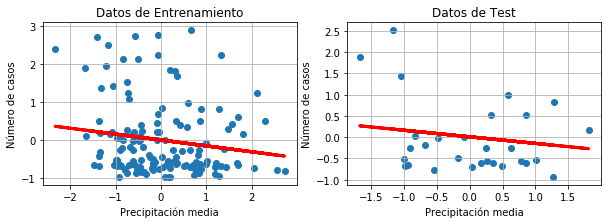

Precisión del modelo: R =  0.06532525390306698



************************Humedad relativa media************************




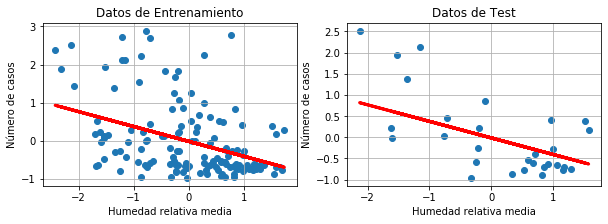

Precisión del modelo: R =  0.384795559788547



***********************Humedad relativa máxima************************




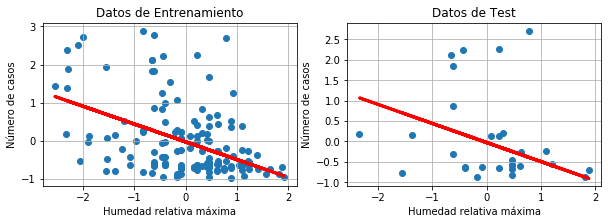

Precisión del modelo: R =  -0.003860016240604613



***********************Humedad relativa mínima************************




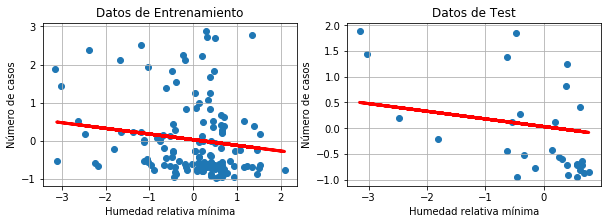

Precisión del modelo: R =  0.14658784516447376



**************************Temperatura media***************************




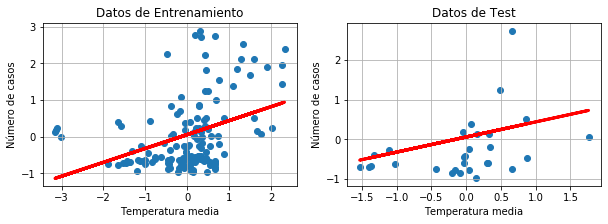

Precisión del modelo: R =  0.0005717550162485097



**************************Temperatura máxima**************************




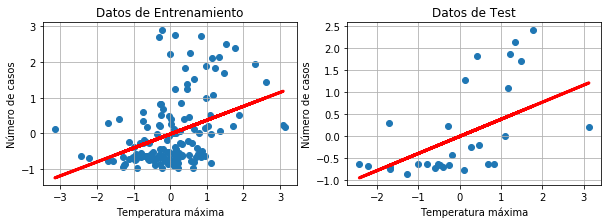

Precisión del modelo: R =  0.3338436304304173



**************************Temperatura mínima**************************




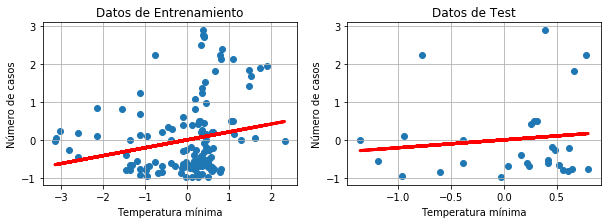

Precisión del modelo: R =  0.0005827416512006467



*******************************Nino1+2********************************




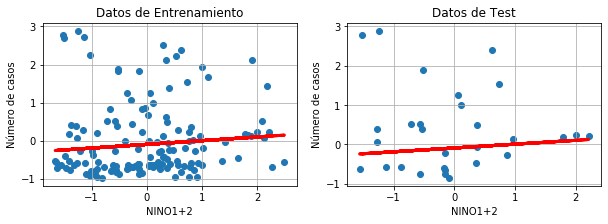

Precisión del modelo: R =  -0.21659206116349994



*********************************Anom*********************************




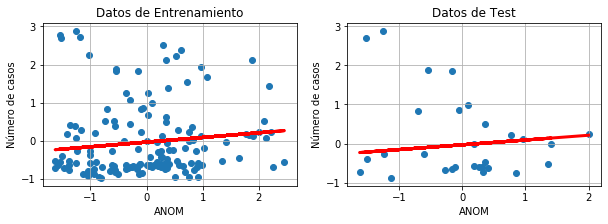

Precisión del modelo: R =  -0.09642034644168751



********************************Nino3*********************************




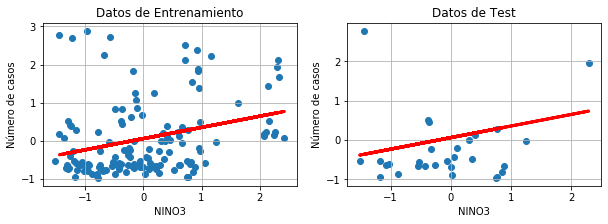

Precisión del modelo: R =  -0.14132470831037347



********************************Anom.1********************************




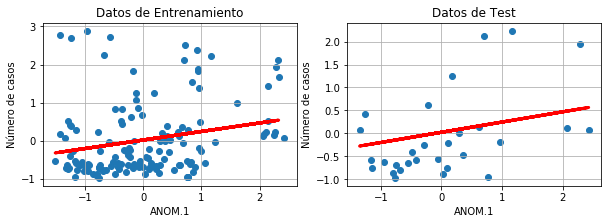

Precisión del modelo: R =  0.17017161023496796



********************************Nino4*********************************




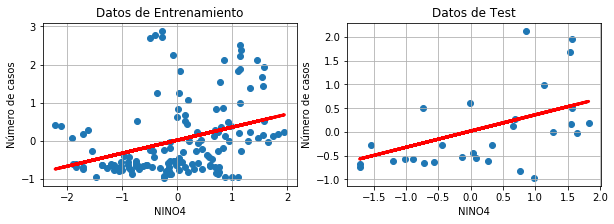

Precisión del modelo: R =  0.26905781337685386



********************************Anom.2********************************




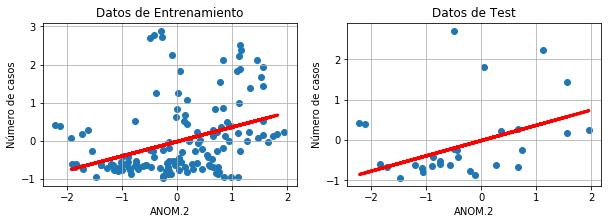

Precisión del modelo: R =  0.1037213545649629



*******************************Nino3.4********************************




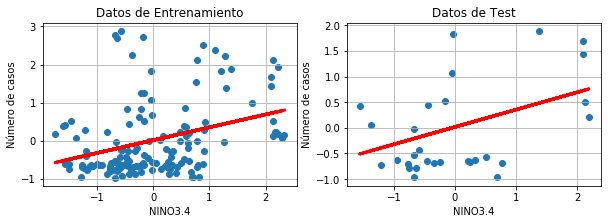

Precisión del modelo: R =  0.2123597646087523



********************************Anom.3********************************




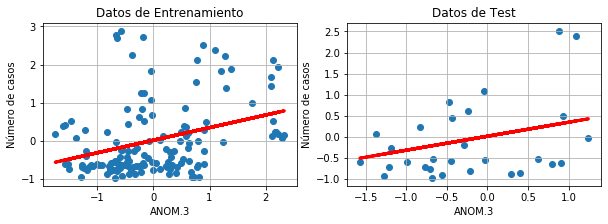

Precisión del modelo: R =  0.1412598478425362





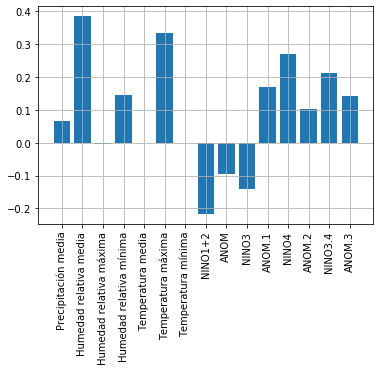

'\n\n\n\n\n'

In [79]:
#Precision en la regresion lineal simple con datos normalizados
P_R_L_S_N = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                      REGRESION LINEL SIMPLE                                      "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Defino el algoritmo a utilizar
    lr = linear_model.LinearRegression()

    #Entreno el modelo
    lr.fit(X_train, y_train)

    #Realizo una predicción para datos de entrenamientos
    Y_pred = lr.predict(X_train)

    
    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_L_S_N[i-2]=lr.score(X_test, y_test)
    print('Precisión del modelo: R = ',P_R_L_S_N[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_L_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


"""




"""


# Regresón lineal simple con datos desnormalizados


=                                      REGRESION LINEL SIMPLE                                      =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




*************************Precipitación media**************************




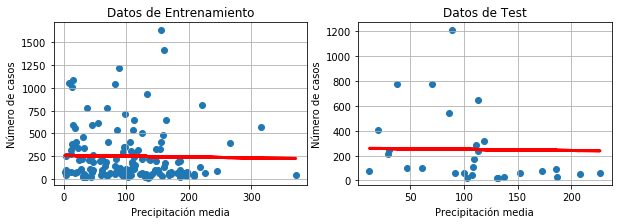

Precisión del modelo: R =  0.009606560216896765



************************Humedad relativa media************************




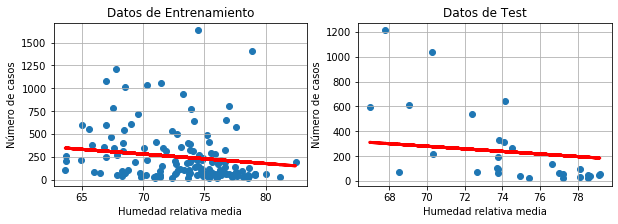

Precisión del modelo: R =  0.1466704419934115



***********************Humedad relativa máxima************************




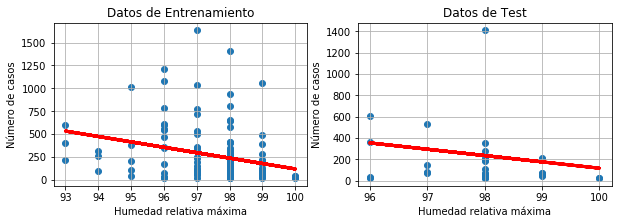

Precisión del modelo: R =  0.010137295636907906



***********************Humedad relativa mínima************************




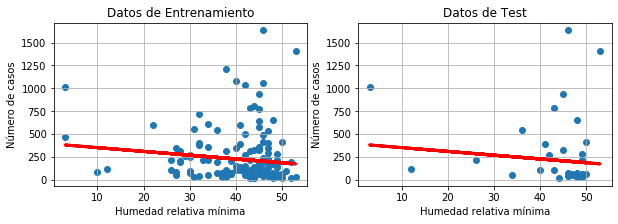

Precisión del modelo: R =  -0.08283363147389133



**************************Temperatura media***************************




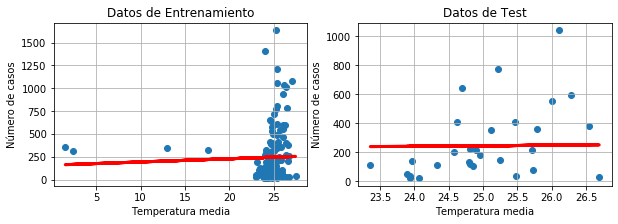

Precisión del modelo: R =  0.0037125998836960994



**************************Temperatura máxima**************************




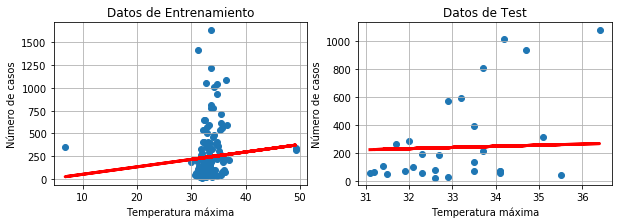

Precisión del modelo: R =  0.022130689470363896



**************************Temperatura mínima**************************




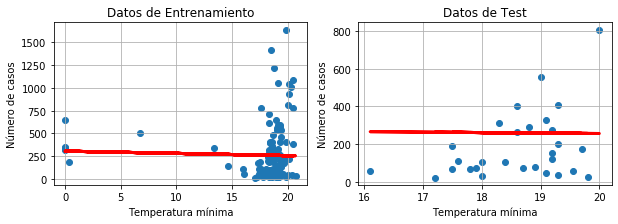

Precisión del modelo: R =  -0.1735826806184917



*******************************Nino1+2********************************




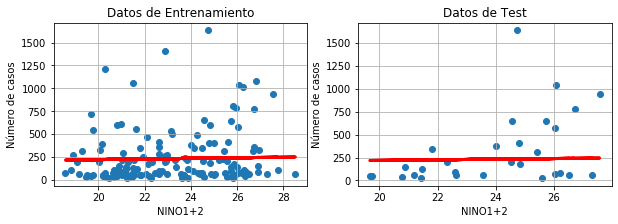

Precisión del modelo: R =  -0.03718220087102653



*********************************Anom*********************************




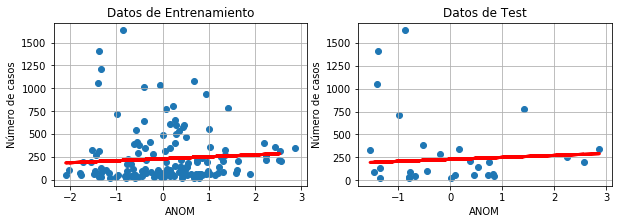

Precisión del modelo: R =  -0.07605461868481989



********************************Nino3*********************************




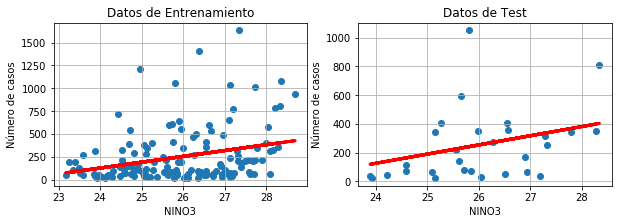

Precisión del modelo: R =  0.13333962419196943



********************************Anom.1********************************




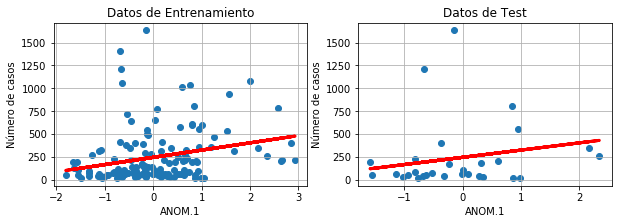

Precisión del modelo: R =  0.008289626165623232



********************************Nino4*********************************




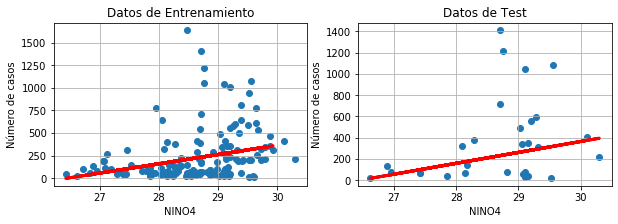

Precisión del modelo: R =  -0.0246758916504084



********************************Anom.2********************************




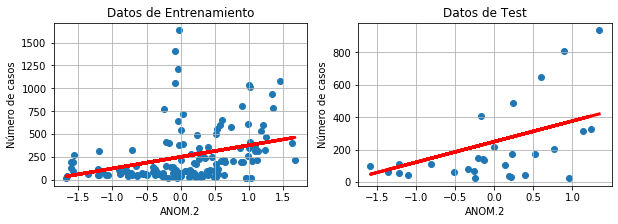

Precisión del modelo: R =  0.2593732714189102



*******************************Nino3.4********************************




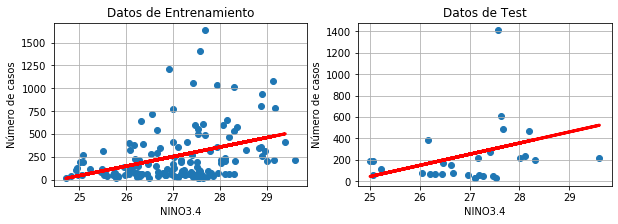

Precisión del modelo: R =  0.03456951086880311



********************************Anom.3********************************




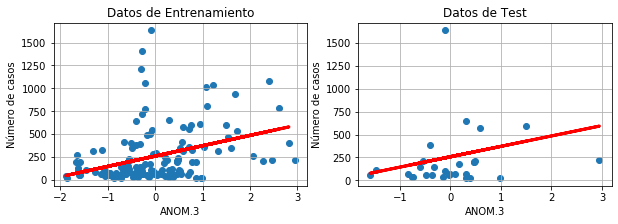

Precisión del modelo: R =  -0.00728517671073714





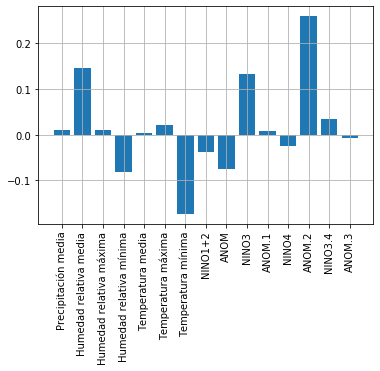

'\n\n\n\n\n'

In [80]:
#Precision en la regresion lineal simple con datos normalizados
P_R_L_S_DN = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                      REGRESION LINEL SIMPLE                                      "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos_dn[0])-2]

for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Defino el algoritmo a utilizar
    lr = linear_model.LinearRegression()

    #Entreno el modelo
    lr.fit(X_train, y_train)

    #Realizo una predicción para datos de entrenamientos
    Y_pred = lr.predict(X_train)

    
    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_L_S_DN[i-2]=lr.score(X_test, y_test)
    print('Precisión del modelo: R = ',P_R_L_S_DN[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]

ax.bar(range(len(P_R_L_S_DN)), P_R_L_S_DN, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


"""




"""


# Regresón lineal Múltiple con datos normalizados

In [81]:
#Precision en la regresion lineal multiple con datos normalizados

cadena = ""
print (cadena.center(100, "="))
cadena = "                                     REGRESION LINEL MULTIPLE                                     "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos[:, 3]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos[:, 4]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura media
X1 = Datos[:, 6]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura máxima
X1 = Datos[:, 7]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos[:, 12:17]
X1 = np.reshape(X1, (L,5))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción para datos de entrenamientos
Y_pred_multiple = lr_multiple.predict(X_test)



print('Precisión del modelo:')
print(lr_multiple.score(X_test, y_test))

=                                     REGRESION LINEL MULTIPLE                                     =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
0.26919126844331187


# Regresón lineal Múltiple con datos desnormalizados

In [82]:
#Precision en la regresion lineal multiple con datos normalizados
#Se usan las variables 
P_R_L_S_N = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                     REGRESION LINEL MULTIPLE                                     "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

# Capturar y estructurar las variables independientes del modelo
# Humedad relativa máxima
X = Datos_dn[:, 4]
X = np.reshape(X, (L,1))

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos_dn[:, 11:17]
X1 = np.reshape(X1, (L,6))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción para datos de entrenamientos
Y_pred_multiple = lr_multiple.predict(X_test)



print('Precisión del modelo:')
print(lr_multiple.score(X_test, y_test))

=                                     REGRESION LINEL MULTIPLE                                     =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




Precisión del modelo:
0.14995228963684226


# Regresón polinomial simple con datos normalizados


=                                    REGRESION POLINOMIAL SIMPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




*************************Precipitación media**************************




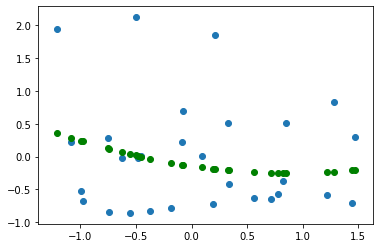

Precisión del modelo:
Precisión del modelo: R =  0.008688803651537125



************************Humedad relativa media************************




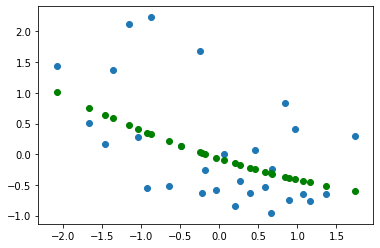

Precisión del modelo:
Precisión del modelo: R =  0.27783865293784127



***********************Humedad relativa máxima************************




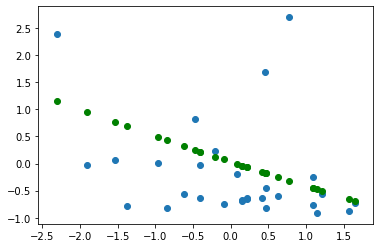

Precisión del modelo:
Precisión del modelo: R =  -0.0008448833492216146



***********************Humedad relativa mínima************************




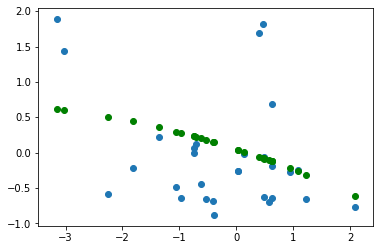

Precisión del modelo:
Precisión del modelo: R =  0.047365279544899885



**************************Temperatura media***************************




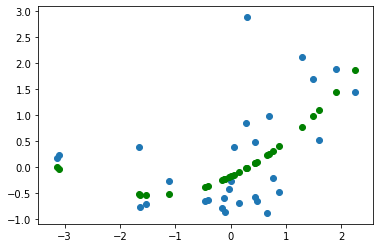

Precisión del modelo:
Precisión del modelo: R =  0.35466438470569417



**************************Temperatura máxima**************************




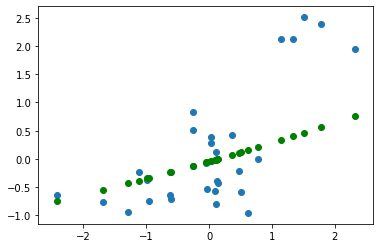

Precisión del modelo:
Precisión del modelo: R =  0.3411575025212027



**************************Temperatura mínima**************************




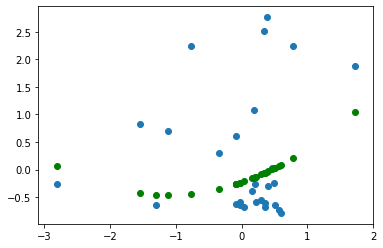

Precisión del modelo:
Precisión del modelo: R =  -0.03831233156771341



*******************************Nino1+2********************************




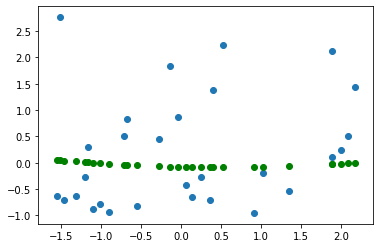

Precisión del modelo:
Precisión del modelo: R =  -0.05909805641800858



*********************************Anom*********************************




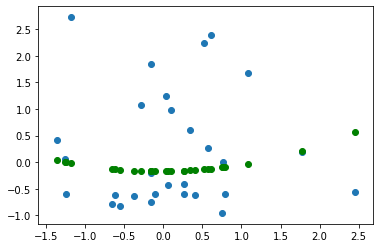

Precisión del modelo:
Precisión del modelo: R =  -0.11773308365372448



********************************Nino3*********************************




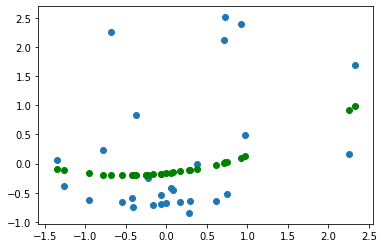

Precisión del modelo:
Precisión del modelo: R =  0.10739729281190502



********************************Anom.1********************************




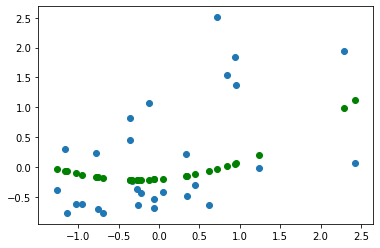

Precisión del modelo:
Precisión del modelo: R =  0.09212971840785056



********************************Nino4*********************************




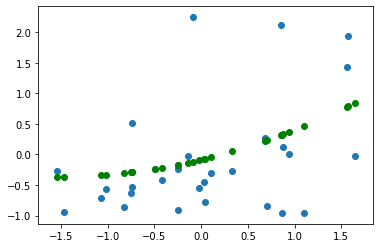

Precisión del modelo:
Precisión del modelo: R =  0.16934213425036793



********************************Anom.2********************************




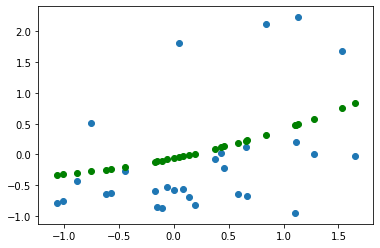

Precisión del modelo:
Precisión del modelo: R =  0.1514759848412517



*******************************Nino3.4********************************




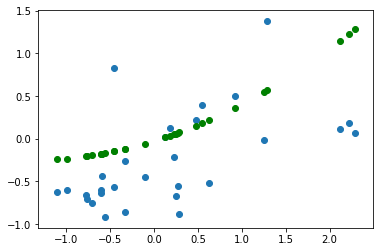

Precisión del modelo:
Precisión del modelo: R =  -0.2853539086684904



********************************Anom.3********************************




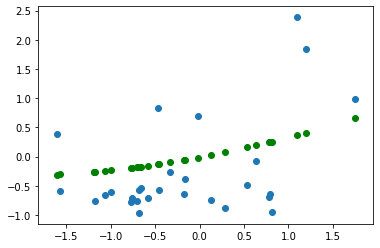

Precisión del modelo:
Precisión del modelo: R =  0.14095947480734505





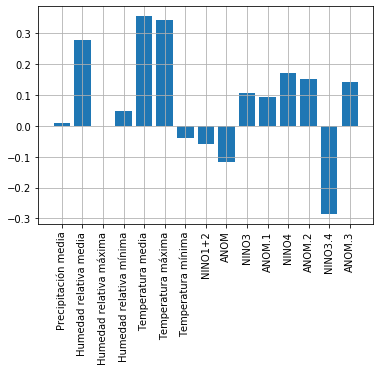

'\n\n\n\n'

In [83]:
#Precision en la regresion polinomial simple con datos normalizados
P_R_POLI_S_N = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                    REGRESION POLINOMIAL SIMPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]


#Se define el grado del polinomio 
poli_reg = PolynomialFeatures(degree = 2)


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    
    
    ########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########


    #Se transforma las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Defino el algoritmo a utilizar
    pr = linear_model.LinearRegression()

    #Entreno el modelo
    pr.fit(X_train_poli, y_train)

    #Realizo una predicción
    Y_pred_pr = pr.predict(X_test_poli)
    
    
    #Graficamos los datos junto con el modelo
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, Y_pred_pr, c="g")
    plt.show()
    
    P_R_POLI_S_N[i-2]=pr.score(X_test_poli, y_test)

    print('Precisión del modelo:')
    print('Precisión del modelo: R = ',P_R_POLI_S_N[i-2])
    print('\n\n') 

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_POLI_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()

"""



"""


# Regresón polinomial Múltiple con datos normalizados (grado 2)¶

In [96]:
#Precision en la regresion lineal multiple con datos normalizados

cadena = ""
print (cadena.center(100, "="))
cadena = "                                  REGRESION POLINOMIAL MULTIPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos[:, 3]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos[:, 4]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura media
X1 = Datos[:, 6]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura máxima
X1 = Datos[:, 7]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# ?????????????????????
X1 = Datos[:, 8]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos[:, 12:17]
X1 = np.reshape(X1, (L,5))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
#plt.scatter(X_test_poli, y_test)
#plt.plot(X_test_poli, Y_pred_pr, color='red', linewidth=3)
#plt.show()


print('Precisión del modelo:')
print(pr.score(X_test_poli, y_test))

=                                  REGRESION POLINOMIAL MULTIPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
-0.5713761296052495


# Regresón polinomial simple con datos desnormalizados

=                                    REGRESION POLINOMIAL SIMPLE                                   =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




*************************Precipitación media**************************




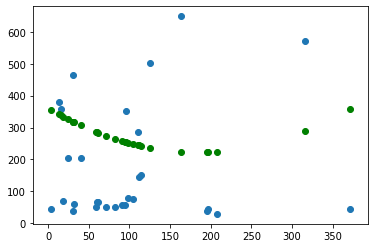

Precisión del modelo:
Precisión del modelo: R =  -0.379049745198655



************************Humedad relativa media************************




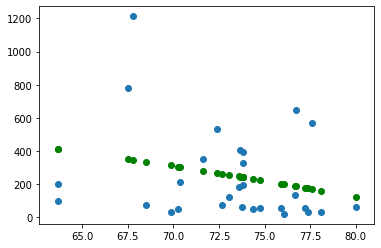

Precisión del modelo:
Precisión del modelo: R =  0.05807142718342595



***********************Humedad relativa máxima************************




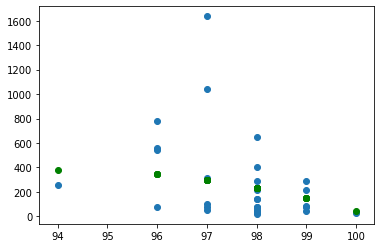

Precisión del modelo:
Precisión del modelo: R =  0.1012733776363427



***********************Humedad relativa mínima************************




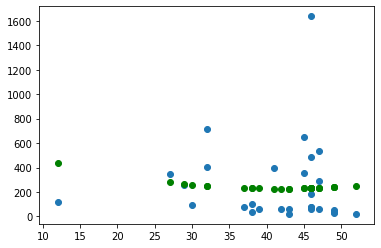

Precisión del modelo:
Precisión del modelo: R =  -0.02929321102843652



**************************Temperatura media***************************




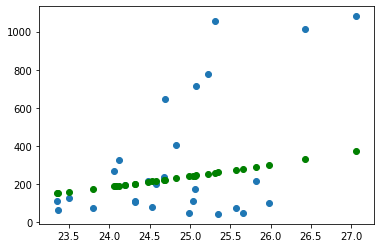

Precisión del modelo:
Precisión del modelo: R =  0.09306861803621536



**************************Temperatura máxima**************************




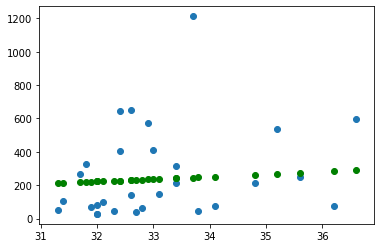

Precisión del modelo:
Precisión del modelo: R =  0.019174772579380273



**************************Temperatura mínima**************************




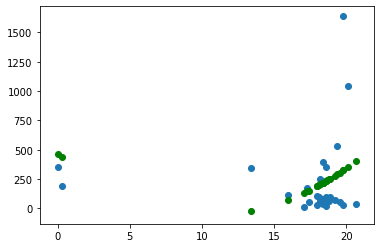

Precisión del modelo:
Precisión del modelo: R =  0.060893817384436666



*******************************Nino1+2********************************




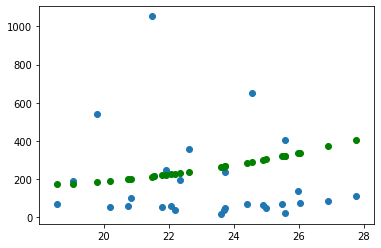

Precisión del modelo:
Precisión del modelo: R =  -0.2854117649958623



*********************************Anom*********************************




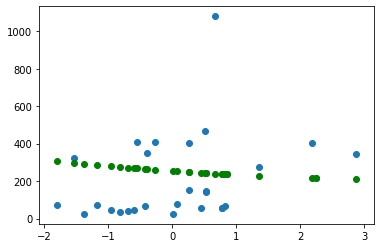

Precisión del modelo:
Precisión del modelo: R =  -0.11526777224040075



********************************Nino3*********************************




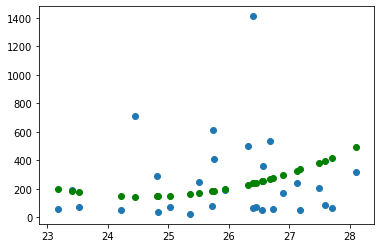

Precisión del modelo:
Precisión del modelo: R =  -0.1408146454825452



********************************Anom.1********************************




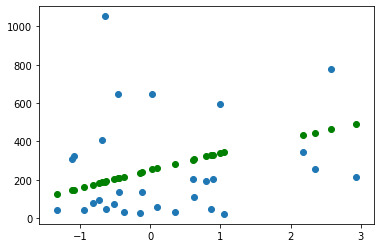

Precisión del modelo:
Precisión del modelo: R =  -0.039629211319923696



********************************Nino4*********************************




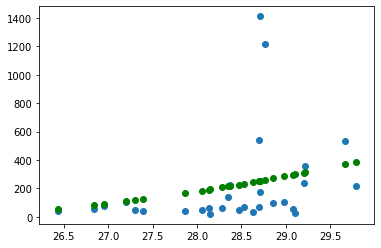

Precisión del modelo:
Precisión del modelo: R =  0.0903890944611726



********************************Anom.2********************************




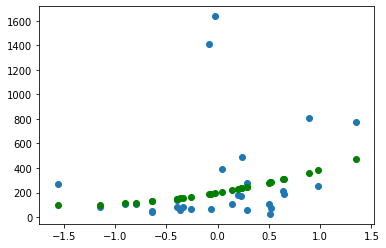

Precisión del modelo:
Precisión del modelo: R =  0.026173783730774836



*******************************Nino3.4********************************




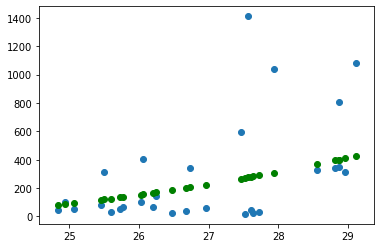

Precisión del modelo:
Precisión del modelo: R =  0.19506742738139127



********************************Anom.3********************************




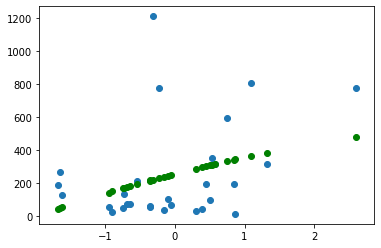

Precisión del modelo:
Precisión del modelo: R =  0.10611598077300166





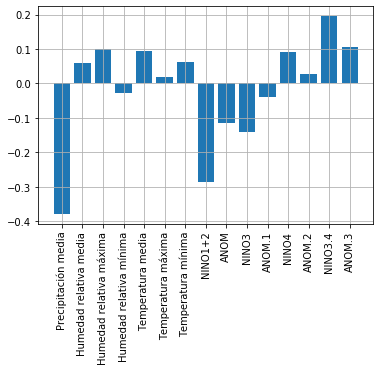

'\n\n\n\n'

In [85]:
#Precision en la regresion polinomial simple con datos normalizados
P_R_POLI_S_DN = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                    REGRESION POLINOMIAL SIMPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos_dn[:, len(Datos[0])-2]


#Se define el grado del polinomio 
poli_reg = PolynomialFeatures(degree = 2)


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    
    
    ########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########



    #Se transforma las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Defino el algoritmo a utilizar
    pr = linear_model.LinearRegression()

    #Entreno el modelo
    pr.fit(X_train_poli, y_train)

    #Realizo una predicción
    Y_pred_pr = pr.predict(X_test_poli)
    
    
    #Graficamos los datos junto con el modelo
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, Y_pred_pr, c="g")
    plt.show()
    
    P_R_POLI_S_DN[i-2]=pr.score(X_test_poli, y_test)

    print('Precisión del modelo:')
    print('Precisión del modelo: R = ',P_R_POLI_S_DN[i-2])
    print('\n\n') 

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_POLI_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()

"""



"""


# Regresón Polinomial Múltiple con datos desnormalizados (grado 2)¶

In [86]:
#Precision en la regresion lineal multiple con datos normalizados

cadena = ""
print (cadena.center(100, "="))
cadena = "                                  REGRESION POLINOMIAL MULTIPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos_dn[:, 8]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos_dn[:, 11]
X1 = np.reshape(X1, (L,1))

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos_dn[:, 14:17]
X1 = np.reshape(X1, (L,3))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
#plt.scatter(X_test_poli, y_test)
#plt.plot(X_test_poli, Y_pred_pr, color='red', linewidth=3)
#plt.show()


print('Precisión del modelo:')
print(pr.score(X_test_poli, y_test))

=                                  REGRESION POLINOMIAL MULTIPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
-0.2729149874472212


# Regresión SVM con datos normalizados

=                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




*************************Precipitación media**************************




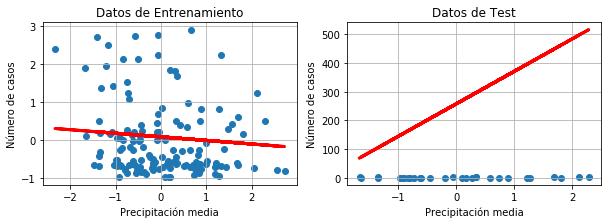

Precisión del modelo: R =  -0.0329615475956464



************************Humedad relativa media************************




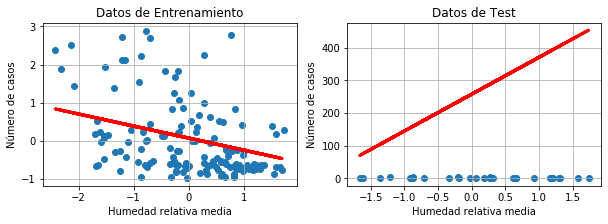

Precisión del modelo: R =  0.14663843592207237



***********************Humedad relativa máxima************************




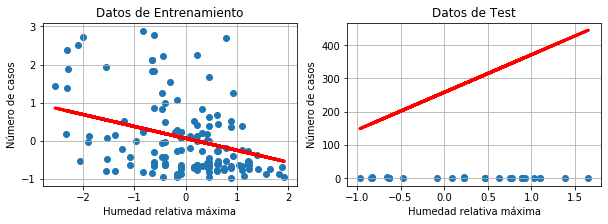

Precisión del modelo: R =  0.09925132332183718



***********************Humedad relativa mínima************************




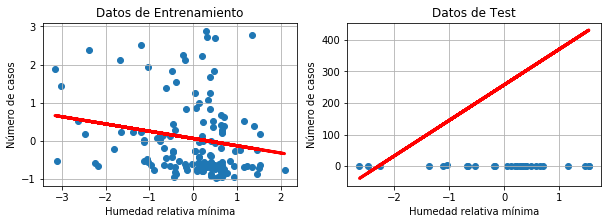

Precisión del modelo: R =  0.028898840990887686



**************************Temperatura media***************************




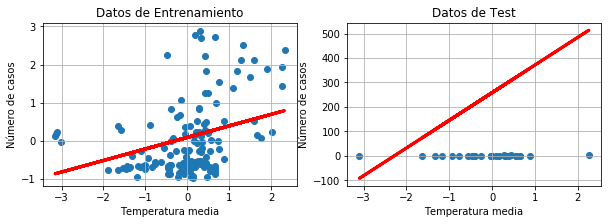

Precisión del modelo: R =  -0.11464327395170137



**************************Temperatura máxima**************************




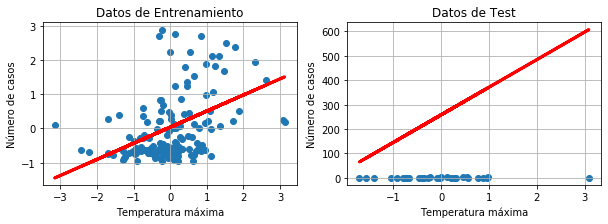

Precisión del modelo: R =  -0.0668382993144725



**************************Temperatura mínima**************************




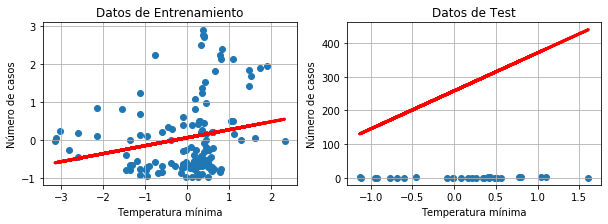

Precisión del modelo: R =  0.032922869819795975



*******************************Nino1+2********************************




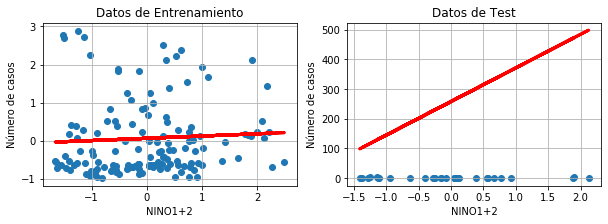

Precisión del modelo: R =  -0.010788966319208448



*********************************Anom*********************************




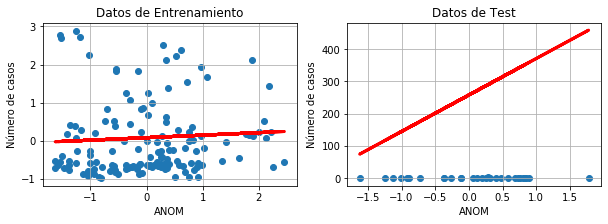

Precisión del modelo: R =  -0.10936097714390747



********************************Nino3*********************************




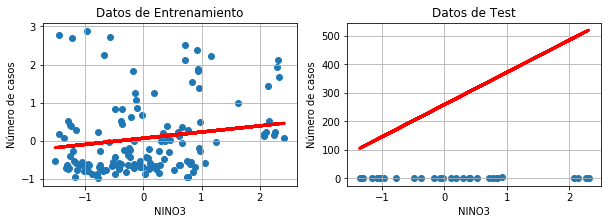

Precisión del modelo: R =  0.15440096826076433



********************************Anom.1********************************




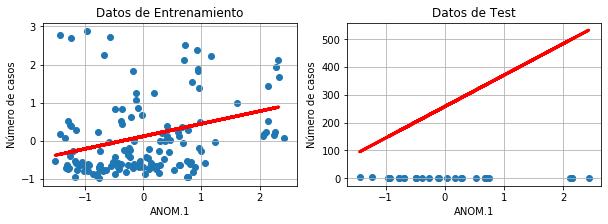

Precisión del modelo: R =  -0.08473084721713153



********************************Nino4*********************************




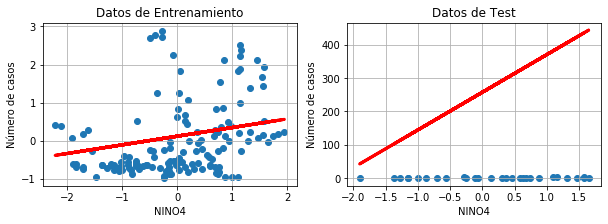

Precisión del modelo: R =  0.15856494216119554



********************************Anom.2********************************




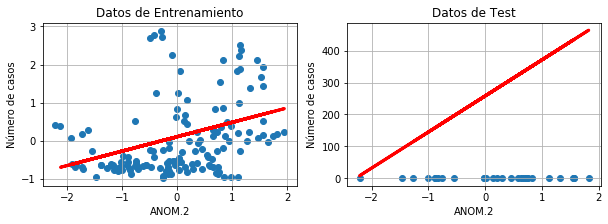

Precisión del modelo: R =  -0.011762843845163129



*******************************Nino3.4********************************




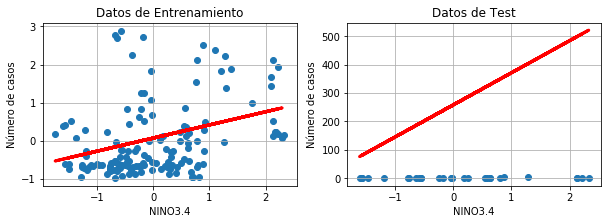

Precisión del modelo: R =  0.14363902182914867



********************************Anom.3********************************




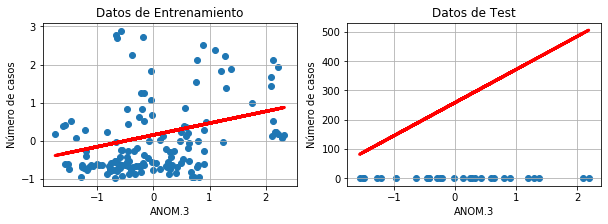

Precisión del modelo: R =  0.1931310776441173





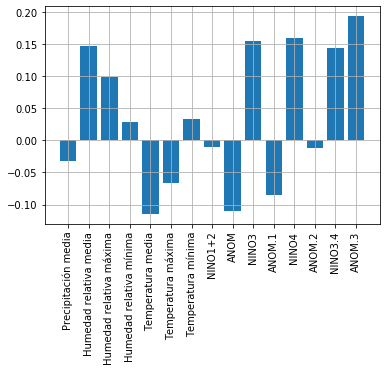

'\n\n\n\n\n'

In [87]:
#Precision en la regresion lineal simple con datos normalizados
P_R_SVM_S_N = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]

#Defino el algoritmo a utilizar
svr = SVR(kernel='linear', C=1.0, epsilon=0.8)

for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Entreno el modelo
    svr.fit(X_train, y_train)

    #Realizo una predicción
    Y_pred = svr.predict(X_train)
    

    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_SVM_S_N[i-2]=svr.score(X_test, y_test)
    print('Precisión del modelo: R = ',P_R_SVM_S_N[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_SVM_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


"""




"""


# Regresión SVM con datos Desnormalizados

=                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           =
=                                                                                                  =
=                             DATOS MENSUALES DESNORMALIZADOS - CALI                               =




*************************Precipitación media**************************




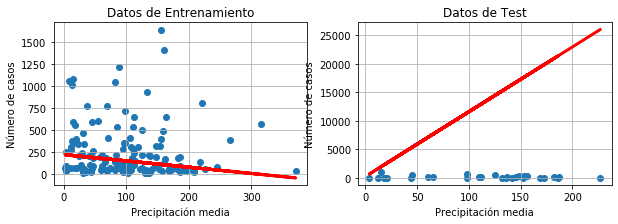

Precisión del modelo: R =  -0.022229048953161804



************************Humedad relativa media************************




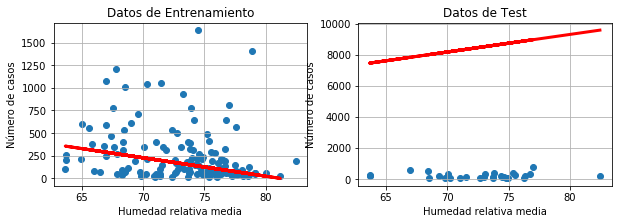

Precisión del modelo: R =  -0.26416819903075006



***********************Humedad relativa máxima************************




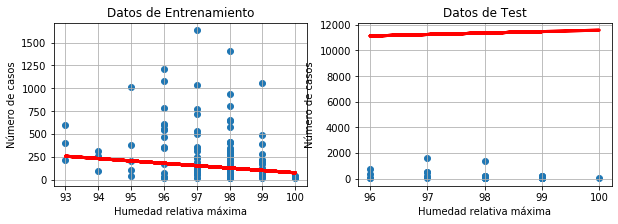

Precisión del modelo: R =  -0.06847662578511327



***********************Humedad relativa mínima************************




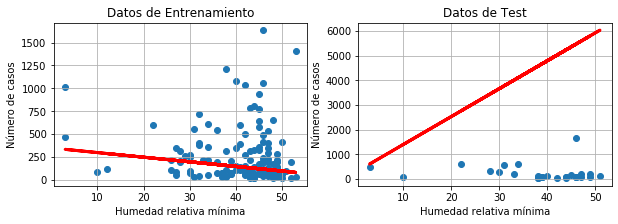

Precisión del modelo: R =  -0.013363638758433494



**************************Temperatura media***************************




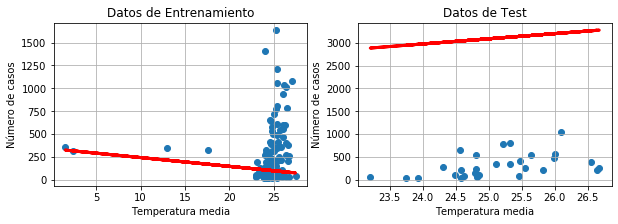

Precisión del modelo: R =  -0.7582239622644642



**************************Temperatura máxima**************************




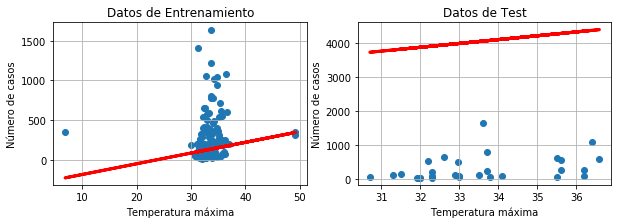

Precisión del modelo: R =  -0.1850235994120213



**************************Temperatura mínima**************************




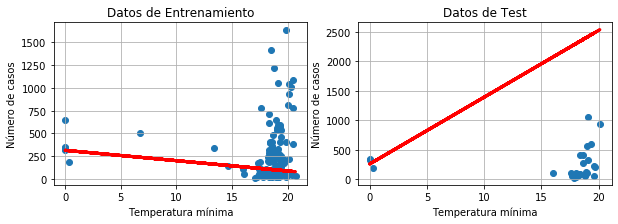

Precisión del modelo: R =  -0.27620563347012284



*******************************Nino1+2********************************




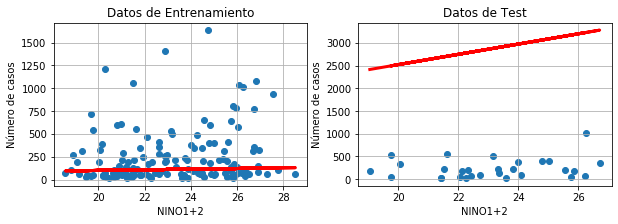

Precisión del modelo: R =  -0.3095260771973938



*********************************Anom*********************************




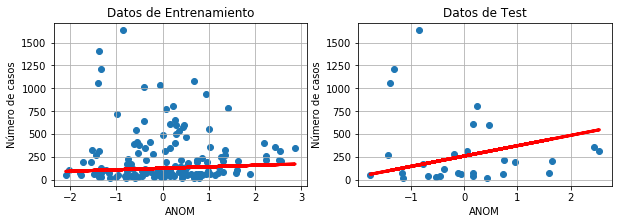

Precisión del modelo: R =  -0.23996698111261083



********************************Nino3*********************************




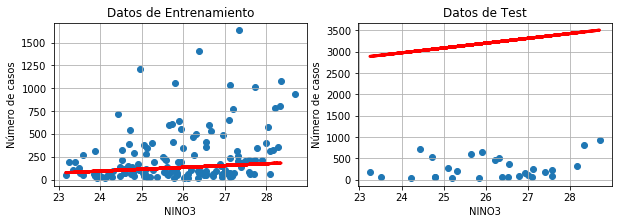

Precisión del modelo: R =  -0.28165739948090485



********************************Anom.1********************************




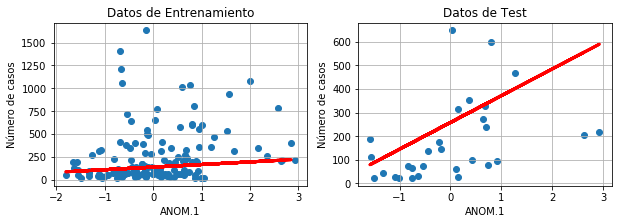

Precisión del modelo: R =  0.06669559617455378



********************************Nino4*********************************




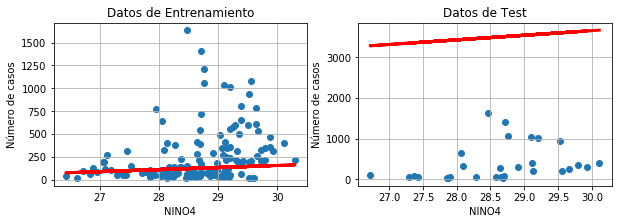

Precisión del modelo: R =  -0.3589574970891469



********************************Anom.2********************************




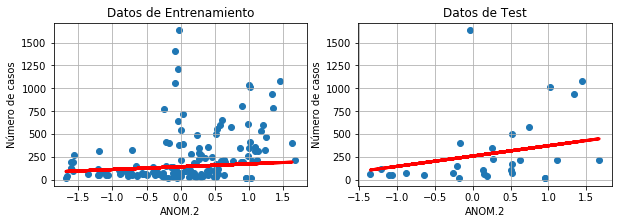

Precisión del modelo: R =  -0.10254452816285364



*******************************Nino3.4********************************




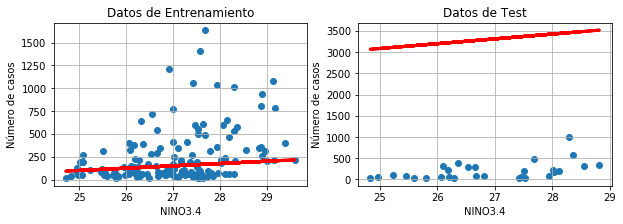

Precisión del modelo: R =  0.043434838398316855



********************************Anom.3********************************




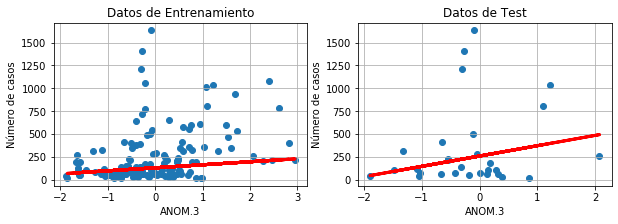

Precisión del modelo: R =  -0.2083627477714336





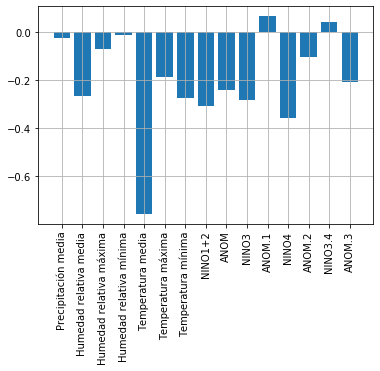

'\n\n\n\n\n'

In [88]:
#Precision en la regresion lineal simple con datos desnormalizados
P_R_SVM_S_DN = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                             DATOS MENSUALES DESNORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos_dn[:, len(Datos[0])-2]

#Defino el algoritmo a utilizar
svr = SVR(kernel='linear', C=1.0, epsilon=0.8)

for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Entreno el modelo
    svr.fit(X_train, y_train)

    #Realizo una predicción
    Y_pred = svr.predict(X_train)
    

    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_SVM_S_DN[i-2]=svr.score(X_test, y_test)
    print('Precisión del modelo: R = ',P_R_SVM_S_DN[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_SVM_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


"""




"""
